# 3 Modeling

# 0) Import Modules

In [2]:
import os
import pandas
from zipfile import ZipFile

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

# 1) Load Data

In [2]:
os.chdir("/Users/anhthyngo/Documents/NYU/Fall 2019/DS-GA 1001/project/ds-ga1001/")

In [3]:
cwd = os.getcwd()
datadir = '/'.join(cwd.split('/')) + '/data/'
listings = datadir + 'airbnb_no_impute.csv.zip'
print(listings)
## Read Data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
zf = ZipFile(listings) 
data = pd.read_csv(zf.open("airbnb_no_impute.csv"),low_memory=False)


/Users/anhthyngo/Documents/NYU/Fall 2019/DS-GA 1001/project/ds-ga1001/data/airbnb_no_impute.csv.zip


**NOTE:** I added the NeighborhoodCleansed feature...the model did a little better, but it has a lot more columns.

In [4]:
y = data['price']
X = data.drop('price',axis = 1)
X.head()


,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,extra_people,neighbourhood_cleansed_Allerton,neighbourhood_cleansed_Arden Heights,neighbourhood_cleansed_Arrochar,neighbourhood_cleansed_Arverne,neighbourhood_cleansed_Astoria,neighbourhood_cleansed_Bath Beach,neighbourhood_cleansed_Battery Park City,neighbourhood_cleansed_Bay Ridge,neighbourhood_cleansed_Bay Terrace,"neighbourhood_cleansed_Bay Terrace, Staten Island",neighbourhood_cleansed_Baychester,neighbourhood_cleansed_Bayside,neighbourhood_cleansed_Bayswater,neighbourhood_cleansed_Bedford-Stuyvesant,neighbourhood_cleansed_Belle Harbor,neighbourhood_cleansed_Bellerose,neighbourhood_cleansed_Belmont,neighbourhood_cleansed_Bensonhurst,neighbourhood_cleansed_Bergen Beach,neighbourhood_cleansed_Boerum Hill,neighbourhood_cleansed_Borough Park,neighbourhood_cleansed_Breezy Point,neighbourhood_cleansed_Briarwood,neighbourhood_cleansed_Brighton Beach,neighbourhood_cleansed_Bronxdale,neighbourhood_cleansed_Brooklyn Heights,neighbourhood_cleansed_Brownsville,neighbourhood_cleansed_Bull's Head,neighbourhood_cleansed_Bushwick,neighbourhood_cleansed_Cambria Heights,neighbourhood_cleansed_Canarsie,neighbourhood_cleansed_Carroll Gardens,neighbourhood_cleansed_Castle Hill,neighbourhood_cleansed_Castleton Corners,neighbourhood_cleansed_Charleston,neighbourhood_cleansed_Chelsea,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_City Island,neighbourhood_cleansed_Civic Center,neighbourhood_cleansed_Claremont Village,neighbourhood_cleansed_Clason Point,neighbourhood_cleansed_Clifton,neighbourhood_cleansed_Clinton Hill,neighbourhood_cleansed_Co-op City,neighbourhood_cleansed_Cobble Hill,neighbourhood_cleansed_College Point,neighbourhood_cleansed_Columbia St,neighbourhood_cleansed_Concord,neighbourhood_cleansed_Concourse,neighbourhood_cleansed_Concourse Village,neighbourhood_cleansed_Coney Island,neighbourhood_cleansed_Corona,neighbourhood_cleansed_Country Club,neighbourhood_cleansed_Crown Heights,neighbourhood_cleansed_Cypress Hills,neighbourhood_cleansed_DUMBO,neighbourhood_cleansed_Ditmars Steinway,neighbourhood_cleansed_Dongan Hills,neighbourhood_cleansed_Douglaston,neighbourhood_cleansed_Downtown Brooklyn,neighbourhood_cleansed_Dyker Heights,neighbourhood_cleansed_East Elmhurst,neighbourhood_cleansed_East Flatbush,neighbourhood_cleansed_East Harlem,neighbourhood_cleansed_East Morrisania,neighbourhood_cleansed_East New York,neighbourhood_cleansed_East Village,neighbourhood_cleansed_Eastchester,neighbourhood_cleansed_Edenwald,neighbourhood_cleansed_Edgemere,neighbourhood_cleansed_Elmhurst,neighbourhood_cleansed_Eltingville,neighbourhood_cleansed_Emerson Hill,neighbourhood_cleansed_Far Rockaway,neighbourhood_cleansed_Fieldston,neighbourhood_cleansed_Financial District,neighbourhood_cleansed_Flatbush,neighbourhood_cleansed_Flatiron District,neighbourhood_cleansed_Flatlands,neighbourhood_cleansed_Flushing,neighbourhood_cleansed_Fordham,neighbourhood_cleansed_Forest Hills,neighbourhood_cleansed_Fort Greene,neighbourhood_cleansed_Fort Hamilton,neighbourhood_cleansed_Fort Wadsworth,neighbourhood_cleansed_Fresh Meadows,neighbourhood_cleansed_Gerritsen Beach,neighbourhood_cleansed_Glendale,neighbourhood_cleansed_Gowanus,neighbourhood_cleansed_Gramercy,neighbourhood_cleansed_Graniteville,neighbourhood_cleansed_Grant City,neighbourhood_cleansed_Gravesend,neighbourhood_cleansed_Great Kills,neighbourhood_cleansed_Greenpoint,neighbourhood_cleansed_Greenwich Village,neighbourhood_cleansed_Grymes Hill,neighbourhood_cleansed_Harlem,neighbourhood_cleansed_Hell's Kitchen,neighbourhood_cleansed_Highbridge,neighbourhood_cleansed_Hollis,neighbourhood_cleansed_Holliswood,neighbourhood_cleansed_Howard Beach,

In [5]:
print("We have",X.shape[0],"rows and",X.shape[1],"columns.")

We have 47638 rows and 308 columns.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# 2) Modeling

In [7]:
from sklearn.linear_model import LinearRegression, Ridge,BayesianRidge, ElasticNet 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor


errvals = np.array([])

clf_labels = np.array(['Linear','Ridge','RForest','ElasticN','GBoost'])
classifiers = [
    LinearRegression(),
    Ridge(alpha = 0.4),
    RandomForestRegressor(n_estimators = 10),
    ElasticNet(),
    GradientBoostingRegressor()
    ]

for classifier in classifiers:
    pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy = 'median')),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    y_pred = pipe.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    errvals = np.append(errvals,mse)
    print("Mean Squared Error: $%.2f" % mean_squared_error(y_test, y_pred))
    print('--------------------------------------')
    #print("model score: %.3f" % pipe.r2_score(X_test, y_test))
    


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Mean Squared Error: $43147.78
--------------------------------------
Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Mean Squared Error: $43075.04
--------------------------------------
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
Mean Squared Error: $48764.35
--------------------------------------
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, posit

Text(0.5,1,'MSE of Different Models')

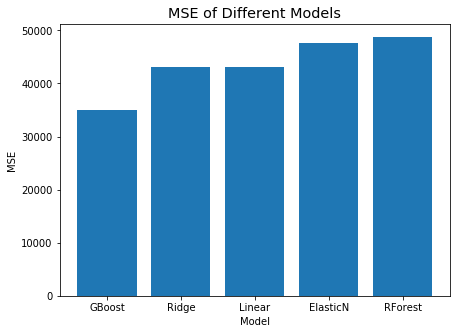

In [8]:
pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
#plt.xkcd()
plt.figure(figsize=(7,5))
plt.bar(pos, errvals[srt], align='center')
plt.style.use('ggplot')
plt.xticks(pos, clf_labels[srt])
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE of Different Models')

## 3.1 Ridge Regression

In [12]:
# gridsearchcv for Ridge Regression

pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy = 'median')),
                      ('clf', Ridge())])
pipe.fit(X_train, y_train)
print("Before cross-validation:")
print("------------------------")
print('Ridge regression R2 score is', round(pipe.score(X_test, y_test)*100,2), '%\n')
print("Residual sum of squares: $%.2f" % np.mean((pipe.predict(X_test) - y_test) ** 2))
print()
# parameters to tune
parameters = dict(clf__alpha =  [10**i for i in range(-3, 3)])


ridge_new = GridSearchCV(pipe, param_grid = parameters, cv = 5)
ridge_new.fit(X_train,y_train)
best_2 = ridge_new.best_score_
print("After cross-validation:")
print("------------------------")
print("The ridge regression R2 score is", round(best_2*100,2),'%')
print("Residual sum of squares: $%.2f" % np.mean((ridge_new.predict(X_test) - y_test) ** 2))

Before cross-validation:
------------------------
Ridge regression R2 score is 25.44 %

Residual sum of squares: $43078.10

After cross-validation:
------------------------
The ridge regression R2 score is 19.52 %
Residual sum of squares: $43277.65


### Done!